In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I have chosen to look at NEVADA as my home state.

home_state = 'Nevada'

sat_2019 = pd.read_csv('sat_2019.csv', index_col='State') # no nulls in csv
sat_by_major_2019 = pd.read_csv('sat_2019_by_intended_college_major.csv', index_col='IntendedCollegeMajor')
sat_2018 = pd.read_csv('sat_2018.csv', index_col='State')
sat_2017 = pd.read_csv('sat_2017.csv', index_col='State')

# CLEANING SAT_2019 DATASET
# Remove Puerto Rico and Virgin Islands as they were not included in previous years' data.
sat_2019 = sat_2019.drop('Puerto Rico')
sat_2019 = sat_2019.drop('Virgin Islands')
# Strip the % sign from the Participation Rate column
def strip_percent_sign (str, axis=1):
    return str.replace("%", "")
    
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(strip_percent_sign)
# Convert Participation Rate column values into integer 
sat_2019 = sat_2019.astype({'Participation Rate':'int'})
# Rename columns to match dataframe name
sat_2019.rename(columns = {'Participation Rate':'Participation Rate (%) 2019','EBRW':'Average EBRW Score 2019','Math':'Average Math Score 2019','Total':'Average Total Score 2019'}, inplace=True)


# CLEANING SAT_BY_MAJOR_2019 DATASET
# Strip the ',' from the Test Takers column
def strip_comma(str, axis=1):
    return str.replace(",", "")
    
sat_by_major_2019['TestTakers'] = sat_by_major_2019['TestTakers'].apply(strip_comma)
# Convert TestTakers column values into integer 
sat_by_major_2019 = sat_by_major_2019.astype({'TestTakers':'int'})
# Strip the '%' sign from the Percent column
sat_by_major_2019['Percent'] = sat_by_major_2019['Percent'].apply(strip_percent_sign)
# Convert Percent column values into integer 
sat_by_major_2019 = sat_by_major_2019.astype({'Percent':'int'})
# Rename columns to make dataframe clearer
sat_by_major_2019.rename(columns = {'IntendedCollegeMajor':'Intended College Major','Percent':'Percent of Total TestTakers Choosing Major', 'Total':'Average Total SAT Score of Those Choosing Major' ,'ReadingWriting':'Average EBRW Score of Those Choosing Major', 'Math':'Average Math Score of Those Choosing Major'}, inplace=True)


# CLEANING SAT_2018 DATASET
# Strip the '%' sign from the Percent column
sat_2018['Participation'] = sat_2018['Participation'].apply(strip_percent_sign)
# Convert Participation column values into integer 
sat_2018 = sat_2018.astype({'Participation':'int'})
# Rename columns to match other datasets
sat_2018.rename(columns = {'Participation':'Participation Rate (%) 2018', 'Evidence-Based Reading and Writing':'Average EBRW Score 2018', 'Math':'Average Math Score 2018', 'Total':'Average Total Score 2018'}, inplace=True)


# CLEANING SAT_2017 DATASET
# Strip the '%' sign from the Percent column
sat_2017['Participation'] = sat_2017['Participation'].apply(strip_percent_sign)
# Convert Participation column values into integer 
sat_2017 = sat_2017.astype({'Participation':'int'})
# Rename columns to match other datasets
sat_2017.rename(columns = {'Participation':'Participation Rate (%) 2017', 'Evidence-Based Reading and Writing':'Average EBRW Score 2017', 'Math':'Average Math Score 2017', 'Total':'Average Total Score 2017'}, inplace=True)


# MERGING SAT_2017, SAT_2018 and SAT_2019
sat_17_18 = pd.merge(sat_2017, sat_2018, left_on='State', right_on='State', suffixes=(' 2017', ' 2018'))
sat_17_18_19 = pd.merge(sat_17_18, sat_2019, left_on='State', right_on='State') #, suffixes=('', ' 2019')


How do the states compare to eachother on SATs?
Which states have the best/worst SAT scores?
Which majors attract the best SAT scorers? 

How have the SATs changed over time? 
Look at the correlation between State Average Total Scores and Participation Rates.

Tech Debt
 - Move the 'Total' column in sat_by_major_2019 to the last column index to match the other datasets
 - Chain syntax to clean up code and remove repetitions


In [ ]:
# sat_by_major_2019.head()
# sat_2017.head()
# sat_2018.head()
# sat_2019.head()

# sat_17_18_19.head(53)

In [168]:
# Creating a new dataframe containing the Participation Rates per year
sat_17_18_19_participation = sat_17_18_19[['Participation Rate (%) 2017', 'Participation Rate (%) 2018', 'Participation Rate (%) 2019']].copy()
# function to find the average Total Score over 3 years of each state
def three_year_participation_score(row):
    return int((row['Participation Rate (%) 2017'] + row['Participation Rate (%) 2018'] + row['Participation Rate (%) 2019'])/3)

sat_17_18_19_participation['Average Participation Rate Over 3 Years'] = sat_17_18_19_participation.apply(three_year_participation_score, axis=1)
# sort values and print statement 
sat_17_18_19_participation.sort_values('Average Participation Rate Over 3 Years', ascending=False, inplace=True)
print(f'The top 5 states for Participation Rates over three years 2017-2019 are {sat_17_18_19_participation.index[0]}, {sat_17_18_19_participation.index[1]}, {sat_17_18_19_participation.index[2]}, {sat_17_18_19_participation.index[3]} and {sat_17_18_19_participation.index[4]}')
sat_17_18_19_participation.head(5)

The top 5 states for Participation Rates over three years 2017-2019 are Michigan, Connecticut, Delaware, Idaho and Maine


,Participation Rate (%) 2017,Participation Rate (%) 2018,Participation Rate (%) 2019,Average Participation Rate Over 3 Years
State,,,,
Michigan,100,100,100,100
Connecticut,100,100,100,100
Delaware,100,100,100,100
Idaho,93,100,100,97
Maine,95,99,99,97


In [169]:
# What were the top 5 performing states in years 2017-2019, based on Average Total Score? 

# Creating a new dataframe containing the Average Total Score per year
sat_17_18_19_totals = sat_17_18_19[['Average Total Score 2017', 'Average Total Score 2018', 'Average Total Score 2019']].copy()
# function to find the average Total Score over 3 years of each state
def three_year_total_score(row):
    return int((row['Average Total Score 2017'] + row['Average Total Score 2018'] + row['Average Total Score 2019'])/3)

sat_17_18_19_totals['Average Total Score Over 3 Years'] = sat_17_18_19_totals.apply(three_year_total_score, axis=1)
# sort values and print statement 
sat_17_18_19_totals.sort_values('Average Total Score Over 3 Years', ascending=False, inplace=True)
print(f'The top 5 performing states over three years 2017-2019 are {sat_17_18_19_totals.index[0]}, {sat_17_18_19_totals.index[1]}, {sat_17_18_19_totals.index[2]}, {sat_17_18_19_totals.index[3]} and {sat_17_18_19_totals.index[4]}')
sat_17_18_19_totals.head(5)

The top 5 performing states over three years 2017-2019 are Minnesota, Wisconsin, North Dakota, Iowa and Missouri


,Average Total Score 2017,Average Total Score 2018,Average Total Score 2019,Average Total Score Over 3 Years
State,,,,
Minnesota,1295,1298,1284,1292
Wisconsin,1291,1294,1283,1289
North Dakota,1256,1283,1263,1267
Iowa,1275,1265,1244,1261
Missouri,1271,1262,1236,1256


In [170]:
# What were the bottom 5 performing states in years 2017-2019, based on Average Total Score? 

# sort values and print statement 
sat_17_18_19_totals.sort_values('Average Total Score Over 3 Years', ascending=True, inplace=True)
print(f'The top 5 performing states over three years 2017-2019 are {sat_17_18_19_totals.index[0]}, {sat_17_18_19_totals.index[1]}, {sat_17_18_19_totals.index[2]}, {sat_17_18_19_totals.index[3]} and {sat_17_18_19_totals.index[4]}')
sat_17_18_19_totals.head(5)

The top 5 performing states over three years 2017-2019 are District of Columbia, Delaware, Idaho, Michigan and West Virginia


,Average Total Score 2017,Average Total Score 2018,Average Total Score 2019,Average Total Score Over 3 Years
State,,,,
District of Columbia,950,977,975,967
Delaware,996,998,985,993
Idaho,1005,1001,993,999
Michigan,1005,1011,1003,1006
West Virginia,1086,999,943,1009


There is a very faint correlation between Participation Rate and Average Total Score each year, with the correlation being strongest in 2017


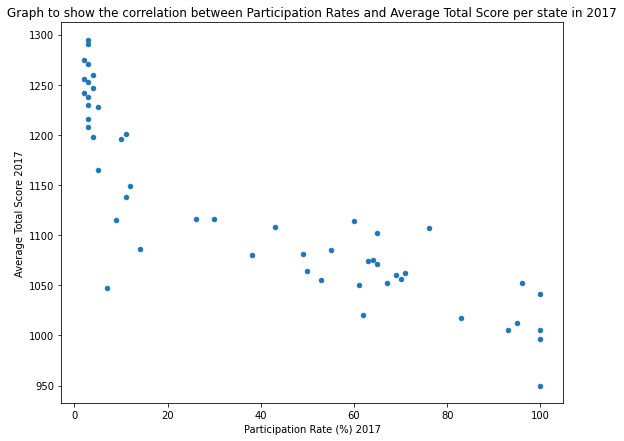

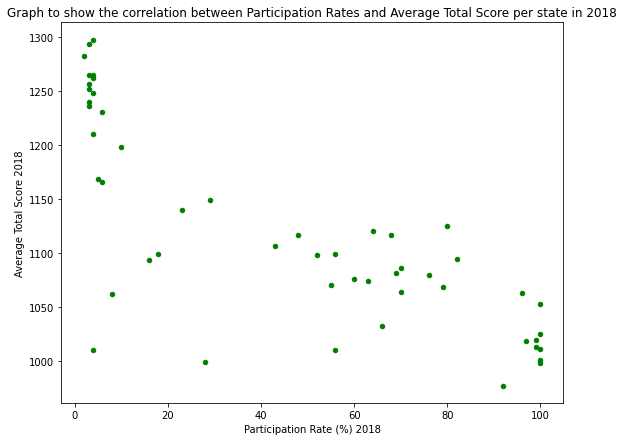

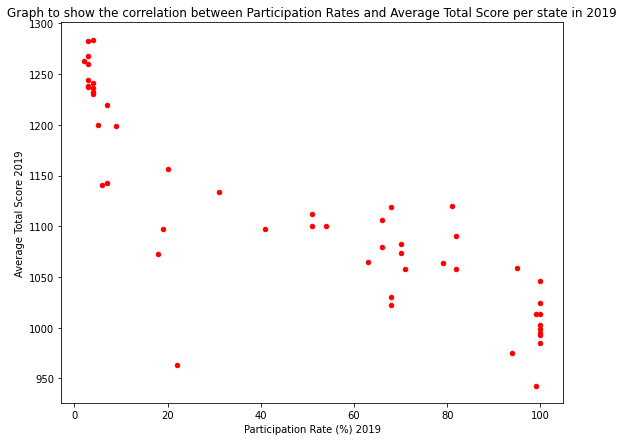

In [172]:
# Show the correlation between low participation rates, and right average total score for each year.
sat_participation_totalscore = pd.merge(sat_17_18_19_participation, sat_17_18_19_totals, left_on='State', right_on='State')

sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2017', y= 'Average Total Score 2017', figsize=(9,7), title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2017');
sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2018', y= 'Average Total Score 2018', figsize=(9,7), c='green', title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2018');
sat_participation_totalscore.plot.scatter(x='Participation Rate (%) 2019', y= 'Average Total Score 2019', figsize=(9,7), c='red', title='Graph to show the correlation between Participation Rates and Average Total Score per state in 2019');

print(f'There is a very faint correlation between Participation Rate and Average Total Score each year, with the correlation being strongest in 2017')

In [173]:
# Participation Rates for 2017
sat_2017_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2017'].mean())
sat_2017_mean_participation
homestate_2017_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2017']

# Participation Rates for 2018
sat_2018_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2018'].mean())
sat_2018_mean_participation
homestate_2018_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2018']

# Participation Rates for 2019
sat_2019_mean_participation = int(sat_participation_totalscore['Participation Rate (%) 2019'].mean())
sat_2019_mean_participation
homestate_2019_participation = sat_17_18_19_participation.loc['Nevada', 'Participation Rate (%) 2019']

print(f'The mean Participation Rate in 2017 was {sat_2017_mean_participation}. The Partipation Rate for {home_state} in 2017 was {homestate_2017_participation}')
print(f'The mean Participation Rate in 2018 was {sat_2018_mean_participation}. The Partipation Rate for {home_state} in 2018 was {homestate_2018_participation}')
print(f'The mean Participation Rate in 2019 was {sat_2019_mean_participation}. The Partipation Rate for {home_state} in 2019 was {homestate_2019_participation}')

print(f'While the Participation Rate for the whole of the US has increased over the years from 2017 to 2019, the Participation Rate for {home_state} has decreased by {int(homestate_2019_participation - homestate_2017_participation)}%.')

The mean Participation Rate in 2017 was 39. The Partipation Rate for Nevada in 2017 was 26
The mean Participation Rate in 2018 was 45. The Partipation Rate for Nevada in 2018 was 23
The mean Participation Rate in 2019 was 49. The Partipation Rate for Nevada in 2019 was 20
While the Participation Rate for the whole of the US has increased over the years from 2017 to 2019, the Participation Rate for Nevada has decreased by -6%.


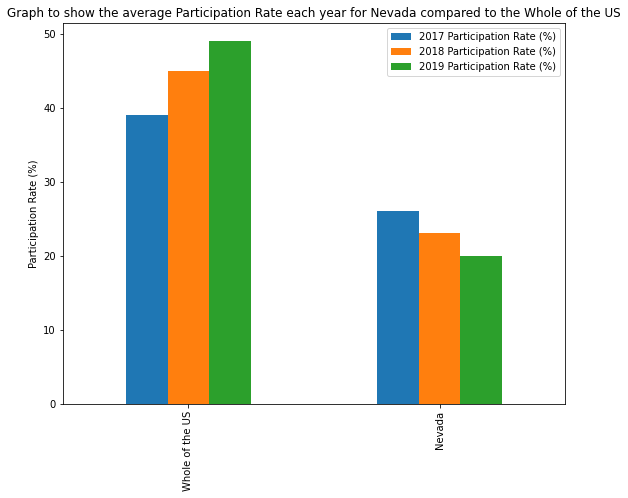

In [174]:
participation_rates = {
    '2017 Participation Rate (%)':[sat_2017_mean_participation, homestate_2017_participation],
    '2018 Participation Rate (%)':[sat_2018_mean_participation, homestate_2018_participation],
    '2019 Participation Rate (%)':[sat_2019_mean_participation, homestate_2019_participation],
}
index_labels = ['Whole of the US', 'Nevada']

participation_df = pd.DataFrame(participation_rates, index=index_labels)
participation_df.plot(kind='bar', figsize=(9,7), ylabel='Participation Rate (%)', title='Graph to show the average Participation Rate each year for Nevada compared to the Whole of the US');

In [175]:
# Average Total Score for 2017
sat_2017_mean_totalscore = int(sat_17_18_19_totals['Average Total Score 2017'].mean())
sat_2017_mean_totalscore
homestate_2017_totalscore = sat_17_18_19_totals.loc['Nevada', 'Average Total Score 2017']

# Average Total Score for 2018
sat_2018_mean_totalscore = int(sat_17_18_19_totals['Average Total Score 2018'].mean())
sat_2018_mean_totalscore
homestate_2018_totalscore = sat_17_18_19_totals.loc['Nevada', 'Average Total Score 2018']

# Average Total Score for 2019
sat_2019_mean_totalscore = int(sat_17_18_19_totals['Average Total Score 2019'].mean())
sat_2019_mean_totalscore
homestate_2019_totalscore = sat_17_18_19_totals.loc['Nevada', 'Average Total Score 2019']

print(f'The Average Total Score for the Whole of the US in 2017 was {sat_2017_mean_totalscore}. The Average Total Score for {home_state} in 2017 was {homestate_2017_totalscore}')
print(f'The Average Total Score for the Whole of the US in 2018 was {sat_2018_mean_totalscore}. The Average Total Score for {home_state} in 2018 was {homestate_2018_totalscore}')
print(f'The Average Total Score for the Whole of the US in 2019 was {sat_2019_mean_totalscore}. The Average Total Score for {home_state} in 2019 was {homestate_2019_totalscore}')
print(f'The Total Average Scores for {home_state} are marginally better than that of the Whole of the US. This shows that, while the Participation Rate for {home_state} is lower, \nthose that did take the SATs in {home_state} performed better on average than the Whole of the US and their scores have been improving year on year.')

The Average Total Score for the Whole of the US in 2017 was 1126. The Average Total Score for Nevada in 2017 was 1116
The Average Total Score for the Whole of the US in 2018 was 1120. The Average Total Score for Nevada in 2018 was 1140
The Average Total Score for the Whole of the US in 2019 was 1113. The Average Total Score for Nevada in 2019 was 1156
The Total Average Scores for Nevada are marginally better than that of the Whole of the US. This shows that, while the Participation Rate for Nevada is lower, 
those that did take the SATs in Nevada performed better on average than the Whole of the US and their scores have been improving year on year.


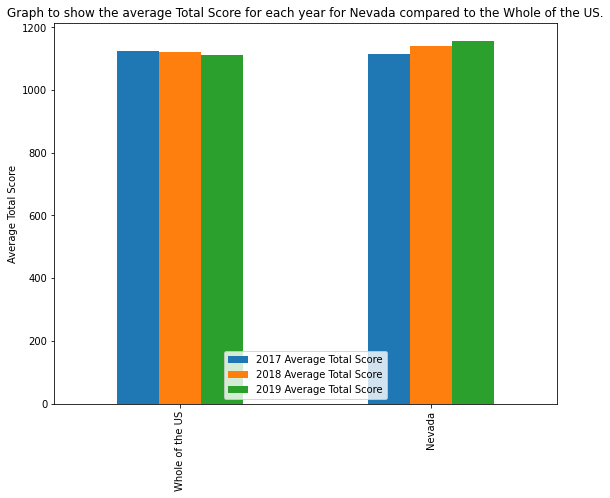

In [176]:
average_totals = {
    '2017 Average Total Score':[sat_2017_mean_totalscore, homestate_2017_totalscore],
    '2018 Average Total Score':[sat_2018_mean_totalscore, homestate_2018_totalscore],
    '2019 Average Total Score':[sat_2019_mean_totalscore, homestate_2019_totalscore],
}

average_totals_df = pd.DataFrame(average_totals, index=index_labels)
average_totals_df.plot(kind='bar', figsize=(9,7), ylabel='Average Total Score', title='Graph to show the average Total Score for each year for Nevada compared to the Whole of the US.');


In [177]:
sat_by_major_2019.sort_values('Average Total SAT Score of Those Choosing Major', ascending=False, inplace=True)
print(f'The 5 Majors that attracted the highest SAT scores in 2019 were {sat_by_major_2019.index[0]}, {sat_by_major_2019.index[1]}, \n{sat_by_major_2019.index[2]}, {sat_by_major_2019.index[3]} and {sat_by_major_2019.index[4]}')
sat_by_major_2019.head()

The 5 Majors that attracted the highest SAT scores in 2019 were Mathematics and Statistics, Physical Sciences, 
Social Sciences, Computer and Information Sciences and Support Services and Multi/Interdisciplinary Studies


,TestTakers,Percent of Total TestTakers Choosing Major,Average Total SAT Score of Those Choosing Major,Average EBRW Score of Those Choosing Major,Average Math Score of Those Choosing Major
IntendedCollegeMajor,,,,,
Mathematics and Statistics,16508,1,1242,597,646
Physical Sciences,26318,1,1203,597,606
Social Sciences,33356,2,1164,594,570
Computer and Information Sciences and Support Services,79736,4,1156,571,585
Multi/Interdisciplinary Studies,2979,0,1155,581,574


In [178]:
college_majors_for_homestate = sat_by_major_2019.drop(sat_by_major_2019[sat_by_major_2019['Average Total SAT Score of Those Choosing Major'] >= 1161].index) 
college_majors_for_homestate = college_majors_for_homestate.drop(college_majors_for_homestate[college_majors_for_homestate['Average Total SAT Score of Those Choosing Major'] <= 1109].index)

print(f'I would suggest the College Board for {home_state} should promote the majors that attract Average SAT Scores that match those of the {home_state} average.')
print(f'The {home_state} average for Total SAT Score is between {homestate_2017_totalscore} and {homestate_2019_totalscore}, so I suggest the Board look at Majors that attract applicants who score \nbetween 1110 and 1160.')
print(f'Those courses are:\n{college_majors_for_homestate.index[0]}, \n{college_majors_for_homestate.index[1]}, \n{college_majors_for_homestate.index[2]}, \n{college_majors_for_homestate.index[3]}, \n{college_majors_for_homestate.index[4]}, \n{college_majors_for_homestate.index[5]}, \n{college_majors_for_homestate.index[6]}')

college_majors_for_homestate.head(8)

I would suggest the College Board for Nevada should promote the majors that attract Average SAT Scores that match those of the Nevada average.
The Nevada average for Total SAT Score is between 1116 and 1156, so I suggest the Board look at Majors that attract applicants who score 
between 1110 and 1160.
Those courses are:
Computer and Information Sciences and Support Services, 
Multi/Interdisciplinary Studies, 
Liberal Arts and Sciences, General Studies and Humanities, 
Biological and Biomedical Sciences, 
Engineering, 
Philosophy and Religious Studies, 
English Language and Literature/Letters


,TestTakers,Percent of Total TestTakers Choosing Major,Average Total SAT Score of Those Choosing Major,Average EBRW Score of Those Choosing Major,Average Math Score of Those Choosing Major
IntendedCollegeMajor,,,,,
Computer and Information Sciences and Support Services,79736,4,1156,571,585
Multi/Interdisciplinary Studies,2979,0,1155,581,574
"Liberal Arts and Sciences, General Studies and Humanities",8611,0,1140,584,556
Biological and Biomedical Sciences,155834,8,1139,572,566
Engineering,194127,11,1139,559,581
Philosophy and Religious Studies,3381,0,1120,572,548
English Language and Literature/Letters,16233,1,1119,585,533
